## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

### Load Dataset Files

In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import cv2

Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
project_path = "/content/drive/My Drive/CNN/Project2/DogBreed_Classification/"
#project_path = "C:/Users/Swathi/Desktop/AIML/CNN/Project2/DogBreed_Classification/"

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'train.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [0]:
with ZipFile(project_path+'test.zip', 'r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
with ZipFile(project_path+'sample_submission.csv.zip', 'r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [0]:
with ZipFile(project_path+'labels.csv.zip', 'r') as z:
  z.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [0]:
#labels_df = pd.read_csv(project_path+"labels.csv")
labels_df = pd.read_csv("labels.csv")

In [10]:
labels_df.head()


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


### Print the count of each category of Dogs given in the dataset



In [11]:
breed_count = labels_df['breed'].value_counts()
breed_count.head()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
Name: breed, dtype: int64

In [12]:
breed_count.shape

(120,)

### Get one-hot encodings of labels

In [0]:
target_labels = pd.Series(labels_df['breed'])
one_hot_encoding = pd.get_dummies(target_labels, sparse=True)
one_hot_labels = np.asarray(one_hot_encoding)

In [14]:
one_hot_labels[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
img_size = 150
img_rows = 150
img_cols = 150
num_channel = 3
X_train = []
y_train = []

In [18]:
for ids, label in tqdm(labels_df.values):
  train_img = cv2.imread('./train/{}.jpg'.format(ids), 1) 
  train_img_resized = cv2.resize(train_img, (img_rows, img_cols))
  X_train.append(train_img_resized)
  y_train.append(label)

100%|██████████| 10222/10222 [00:31<00:00, 328.87it/s]


In [20]:
y_train[0]

'boston_bull'

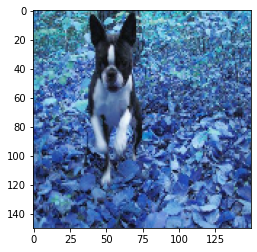

In [21]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [0]:
#normalize the image data
X_train = np.array(X_train)/255

In [0]:
#converting in to 4 dimensions
x_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2],3))

In [0]:
#one-hot-encode the labels
y_train = pd.Series(y_train)
y_train = pd.get_dummies(y_train, sparse=True)
y_train_data = np.asarray(y_train)

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [0]:
X_train_new, X_validation, y_train_new, y_validation = train_test_split(X_train, y_train_data, test_size=0.30, random_state=6)


In [26]:
print(X_train_new.shape)
print(X_validation.shape)


(7155, 150, 150, 3)
(3067, 150, 150, 3)


### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [0]:
sample_df = pd.read_csv('sample_submission.csv')

In [0]:
test_img = sample_df['id']

Run the below code to load the test image files in x_test_feature

In [0]:
x_test_feature = []
i = 0 # initialisation
for f in tqdm(test_img.values): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f), 1)
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_feature.append(img_resize)

100%|██████████| 10357/10357 [00:32<00:00, 316.62it/s]


Normalize the test data and convert it into 4 dimensions

In [0]:
#normalize the test image data
X_test_img = np.array(x_test_feature)/255

In [0]:
#converting in to 4 dimensions
X_test_img = np.reshape(X_test_img, (X_test_img.shape[0], X_test_img.shape[1], X_test_img.shape[2],3))
print(X_test_img.shape)

(10357, 150, 150, 3)


### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [0]:
#Clear any previous model from memory
tf.keras.backend.clear_session()

#Initialize model
model = tf.keras.models.Sequential()

#Add Conv Layer
model.add(tf.keras.layers.Conv2D(32, kernel_size=(5,5),input_shape=(150,150,3,), activation='relu'))

#Add Conv Layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))

#Add Dense Layers after flattening the data
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))

#Add Output Layer
model.add(tf.keras.layers.Dense(120, activation='softmax'))

### Use batch_size = 128 and epochs = 10 and execute the model

In [0]:
#Specify Loass and Optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 146, 146, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 144, 144, 64)      18496     
_________________________________________________________________
flatten (Flatten)            (None, 1327104)           0         
_________________________________________________________________
dense (Dense)                (None, 256)               339738880 
_________________________________________________________________
dense_1 (Dense)              (None, 120)               30840     
Total params: 339,790,648
Trainable params: 339,790,648
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit(X_train_new, y_train_new,          
          validation_data=(X_validation,y_validation),
          epochs=10,
          batch_size=128)

Epoch 1/10
56/56 [==============================] - 43s 768ms/step - loss: 10.9329 - accuracy: 0.0068 - val_loss: 4.7870 - val_accuracy: 0.0082
Epoch 2/10
56/56 [==============================] - 41s 731ms/step - loss: 4.7880 - accuracy: 0.0113 - val_loss: 4.7865 - val_accuracy: 0.0088
Epoch 3/10
56/56 [==============================] - 41s 737ms/step - loss: 4.7766 - accuracy: 0.0145 - val_loss: 4.7782 - val_accuracy: 0.0078
Epoch 4/10
56/56 [==============================] - 41s 740ms/step - loss: 4.7837 - accuracy: 0.0189 - val_loss: 4.7857 - val_accuracy: 0.0091
Epoch 5/10
56/56 [==============================] - 41s 730ms/step - loss: 4.7778 - accuracy: 0.0158 - val_loss: 4.8699 - val_accuracy: 0.0078
Epoch 6/10
56/56 [==============================] - 41s 732ms/step - loss: 4.5301 - accuracy: 0.0521 - val_loss: 4.8281 - val_accuracy: 0.0199
Epoch 7/10
56/56 [==============================] - 41s 736ms/step - loss: 2.8086 - accuracy: 0.3800 - val_loss: 6.2075 - val_accuracy: 0.020

#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
#ImageDataGenerator declaration with 20% data as test (80% for training)
img_generator= tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                               width_shift_range=0.2,
                                                               height_shift_range=0.2,
                                                               horizontal_flip=True,
                                                               validation_split=0.2)

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
#Build training generator. 
train_generator = img_generator.flow(X_train_new, y_train_new, batch_size=32)

#Build test generator
val_generator = img_generator.flow(X_validation, y_validation, batch_size=32)


In [0]:
#Saving the best model using model checkpoint callback
#model_checkpoint=tf.keras.callbacks.ModelCheckpoint('dogbreed_cnn.h5', 
 #                                                   save_best_only=True, 
  #                                                  monitor='val_accuracy', 
   #                                                 mode='max', 
    #                                                verbose=1)

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [38]:
model.fit_generator(train_generator,
                    epochs=10,
                    steps_per_epoch= 7155//128,  #Number of training images//batch_size
                    validation_data=val_generator,
                    validation_steps = 3067//128, #Number of test images//batch_size
                    )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
55/55 [==============================] - 20s 370ms/step - loss: 4.9991 - accuracy: 0.0085 - val_loss: 4.7865 - val_accuracy: 0.0122
Epoch 2/10
55/55 [==============================] - 20s 369ms/step - loss: 4.8140 - accuracy: 0.0102 - val_loss: 4.7833 - val_accuracy: 0.0122
Epoch 3/10
55/55 [==============================] - 20s 368ms/step - loss: 4.7797 - accuracy: 0.0108 - val_loss: 4.7816 - val_accuracy: 0.0109
Epoch 4/10
55/55 [==============================] - 20s 367ms/step - loss: 4.7828 - accuracy: 0.0131 - val_loss: 4.7914 - val_accuracy: 0.0041
Epoch 5/10
55/55 [==============================] - 21s 375ms/step - loss: 4.7776 - accuracy: 0.0103 - val_loss: 4.7873 - val_accuracy: 0.0082
Epoch 6/10
55/55 [==============================] - 20s 368ms/step - loss: 4.7796 - accuracy: 0.0119 - val_loss: 4.7860 - val_accuracy: 0.0095
Epoch 7/10
55/55 [==============================] - 20s 370ms/step

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= VGG16(weights=(project_path+'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False, pooling='max')

Print the summary of the base_model

In [40]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
x = base_model.output
# add flatten layer
x = tf.keras.layers.Flatten()(x)
# let's add a fully-connected layer
x = tf.keras.layers.Dense(1024, activation='relu')(x)

#add batch normalization
x = tf.keras.layers.BatchNormalization()(x)
#add dropout
x = tf.keras.layers.Dropout(0.4)(x)


# let's add a fully-connected layer
x = tf.keras.layers.Dense(256, activation='relu')(x) 

#add batch normalization
x = tf.keras.layers.BatchNormalization()(x)
#add dropout
x = tf.keras.layers.Dropout(0.2)(x)


# Dense layer with 120 neurons with activation as Softmax
predictions = tf.keras.layers.Dense(120, activation='softmax')(x)

### Make all the layers in the base_model (VGG16) to be non-trainable

In [0]:
for layer in base_model.layers:
    layer.trainable = False

### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [0]:
# this is the model we will train
final_model = tf.keras.models.Model(inputs=base_model.input, outputs=predictions)

In [44]:
final_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [0]:
# compile the model (should be done *after* setting layers to non-trainable)
#adam = tf.keras.optimizers.Adam(learning_rate=0.01)
final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
#Saving the best model using model checkpoint callback
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('dogbreed_cnn.h5', 
                                                    save_best_only=True, 
                                                    monitor='val_accuracy', 
                                                    mode='max', 
                                                    verbose=1)

In [47]:
final_model.fit_generator(train_generator,
                    epochs=20,
                    steps_per_epoch= 7155//128,  #Number of training images//batch_size
                    validation_data=val_generator,
                    validation_steps = 3067//128, #Number of test images//batch_size
                    callbacks = [model_checkpoint])

Epoch 1/20
55/55 [==============================] - ETA: 0s - loss: 5.1508 - accuracy: 0.0256
Epoch 00001: val_accuracy improved from -inf to 0.01630, saving model to dogbreed_cnn.h5
55/55 [==============================] - 14s 263ms/step - loss: 5.1508 - accuracy: 0.0256 - val_loss: 4.8207 - val_accuracy: 0.0163
Epoch 2/20
55/55 [==============================] - ETA: 0s - loss: 4.6765 - accuracy: 0.0506
Epoch 00002: val_accuracy improved from 0.01630 to 0.04212, saving model to dogbreed_cnn.h5
55/55 [==============================] - 14s 260ms/step - loss: 4.6765 - accuracy: 0.0506 - val_loss: 4.5487 - val_accuracy: 0.0421
Epoch 3/20
55/55 [==============================] - ETA: 0s - loss: 4.2105 - accuracy: 0.0962
Epoch 00003: val_accuracy improved from 0.04212 to 0.09511, saving model to dogbreed_cnn.h5
55/55 [==============================] - 15s 281ms/step - loss: 4.2105 - accuracy: 0.0962 - val_loss: 4.1797 - val_accuracy: 0.0951
Epoch 4/20
55/55 [==============================]

In [49]:
#Lets train for 30 more steps
final_model.fit_generator(train_generator, 
                          epochs=50,
                          initial_epoch=20,
                          steps_per_epoch= 7155//128,
                          validation_data=val_generator,
                          validation_steps = 3067//128, 
                          callbacks=[model_checkpoint])

Epoch 21/50
55/55 [==============================] - ETA: 0s - loss: 2.9015 - accuracy: 0.2891
Epoch 00021: val_accuracy did not improve from 0.22962
55/55 [==============================] - 14s 257ms/step - loss: 2.9015 - accuracy: 0.2891 - val_loss: 3.2296 - val_accuracy: 0.2228
Epoch 22/50
55/55 [==============================] - ETA: 0s - loss: 2.9160 - accuracy: 0.2784
Epoch 00022: val_accuracy did not improve from 0.22962
55/55 [==============================] - 14s 261ms/step - loss: 2.9160 - accuracy: 0.2784 - val_loss: 3.2774 - val_accuracy: 0.2228
Epoch 23/50
55/55 [==============================] - ETA: 0s - loss: 2.9186 - accuracy: 0.2739
Epoch 00023: val_accuracy did not improve from 0.22962
55/55 [==============================] - 14s 259ms/step - loss: 2.9186 - accuracy: 0.2739 - val_loss: 3.2471 - val_accuracy: 0.2255
Epoch 24/50
55/55 [==============================] - ETA: 0s - loss: 3.0289 - accuracy: 0.2597
Epoch 00024: val_accuracy improved from 0.22962 to 0.23641,

 The first model build using convolutional neural network is overfitted. Fine tuned this model with image augmentation but accuracy is very poor. Lastly, with the use of the pretrained model VGG-16 and fine-tuned with image augmentation, batch normalization and dropout,  could achieve an accuracy of 25.9%